In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LogisticRegression
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report,f1_score,confusion_matrix)
import xgboost
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [22]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [23]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [24]:
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

In [26]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


**Dropping URL as its not making any sense**

In [27]:
#droping url
df.drop(columns=['url'],inplace=True)

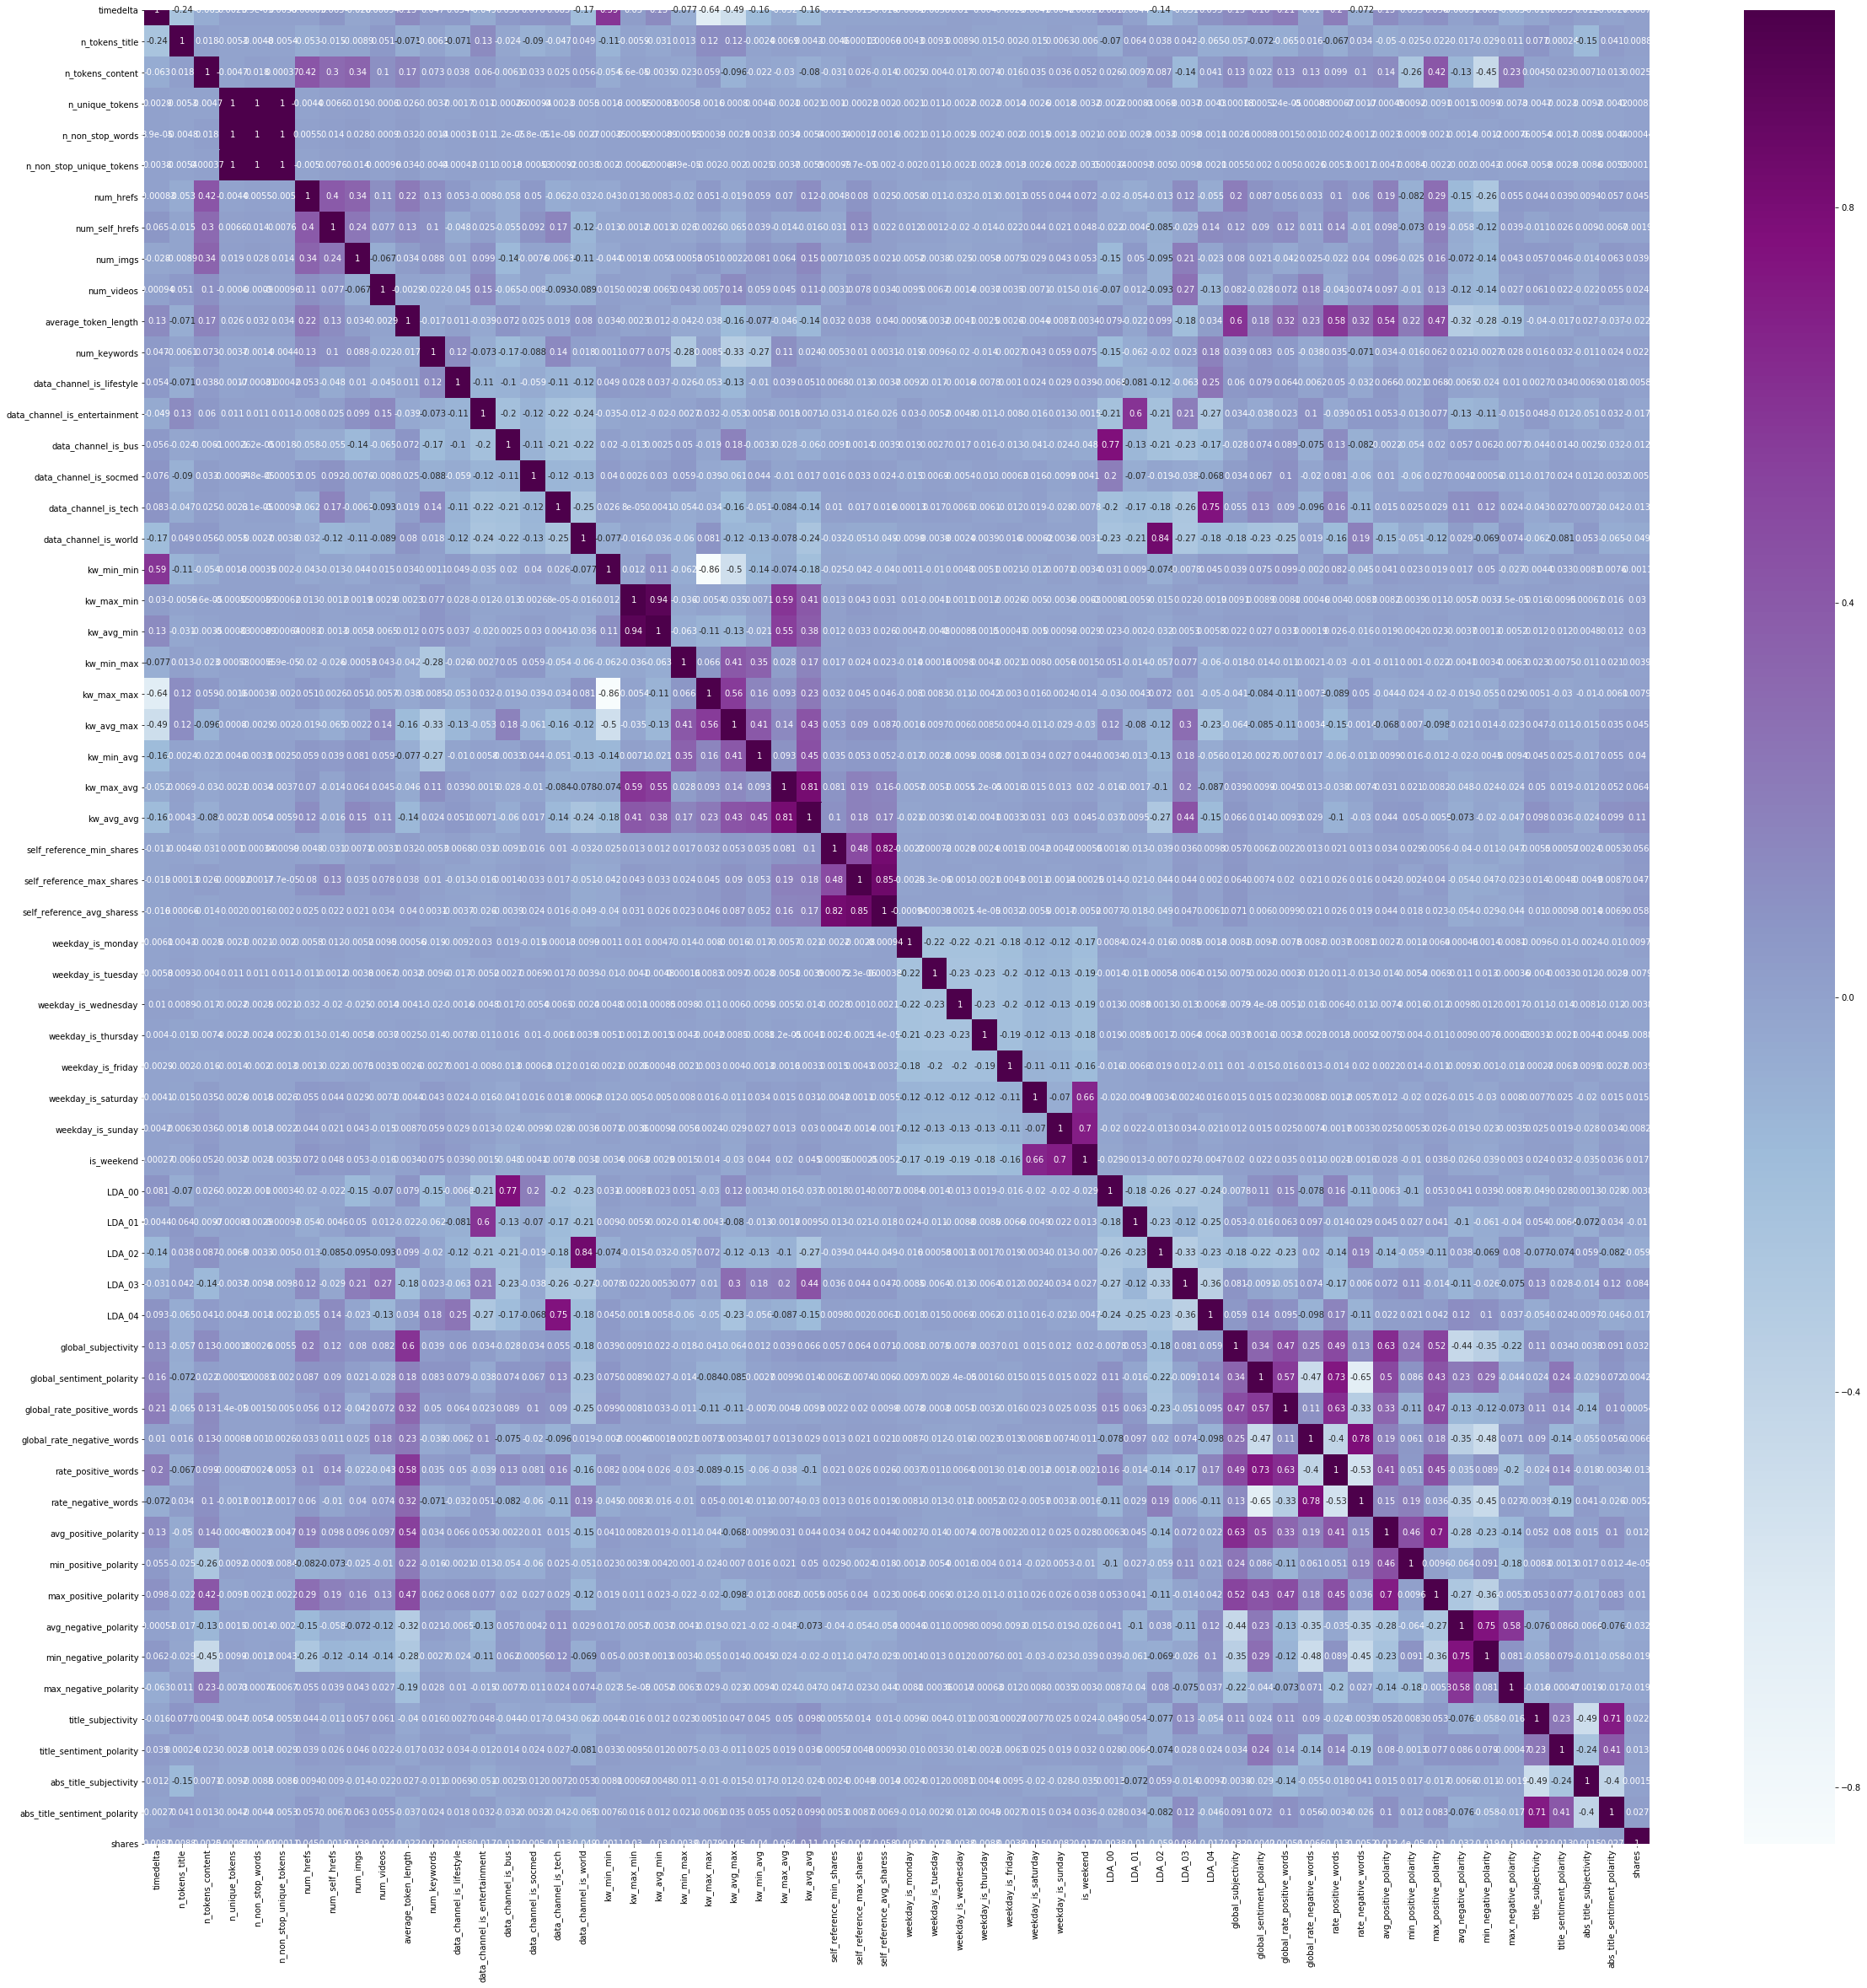

In [28]:
#correlation plot
plt.figure(figsize=(40,40))
sns.heatmap(data=df.corr(),annot=True,cmap='BuPu')

From correlation plot we can see most of the features are important

In [29]:
df.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

**Box plots**

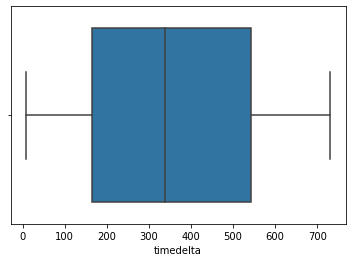

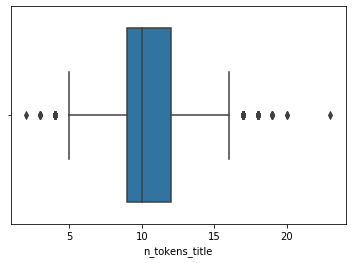

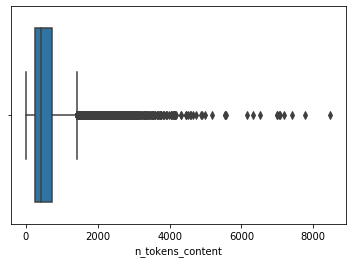

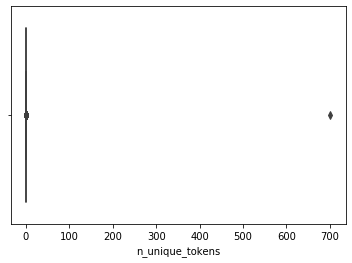

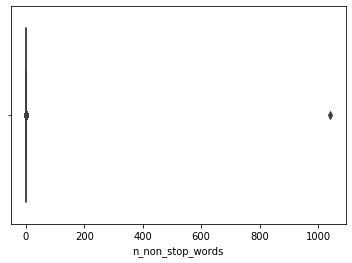

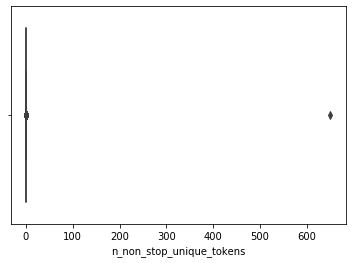

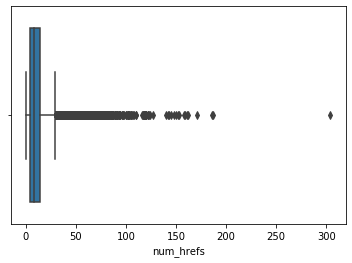

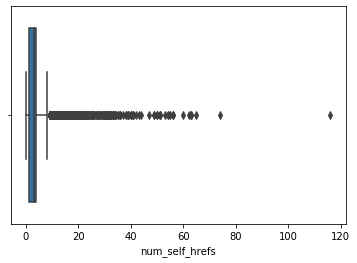

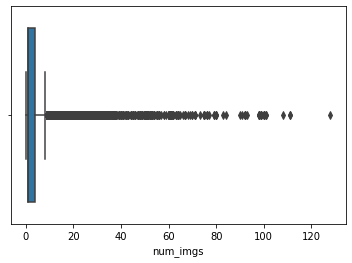

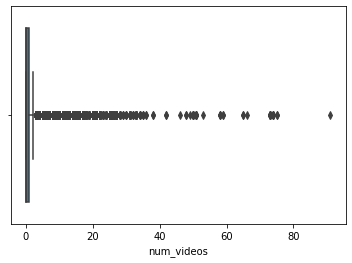

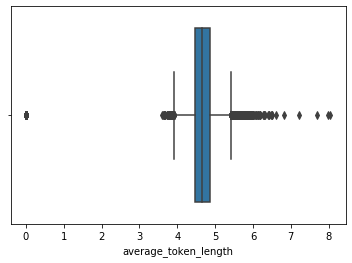

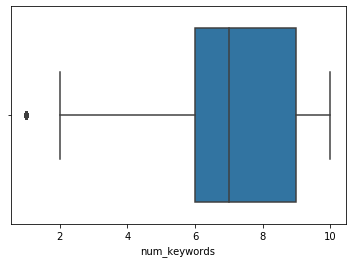

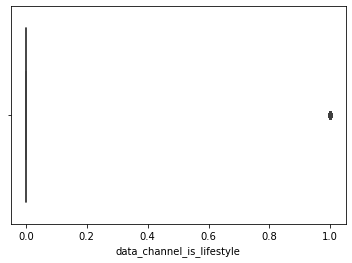

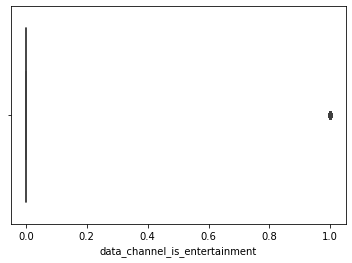

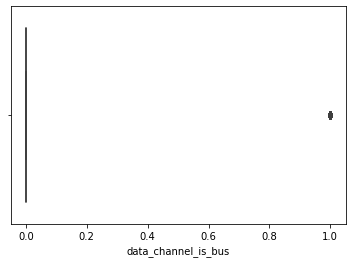

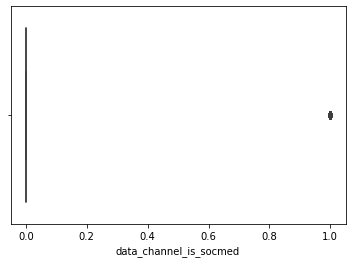

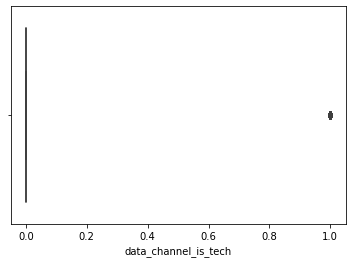

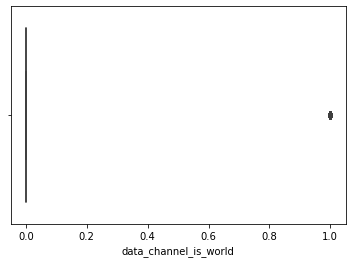

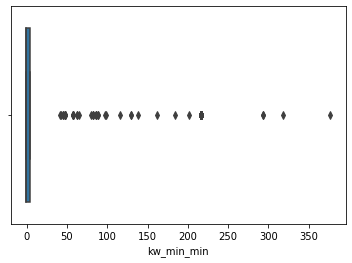

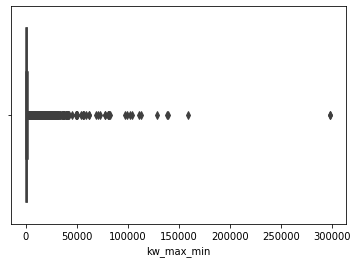

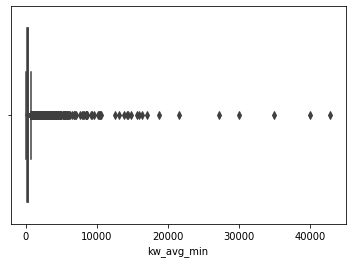

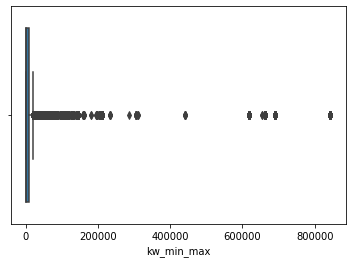

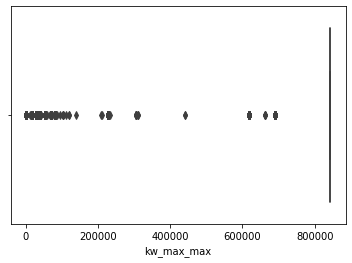

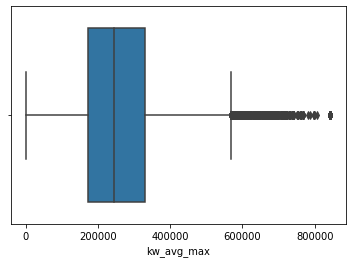

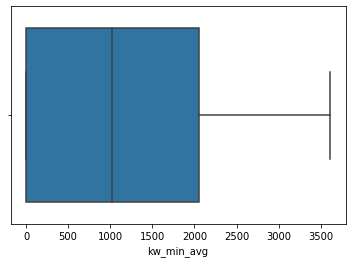

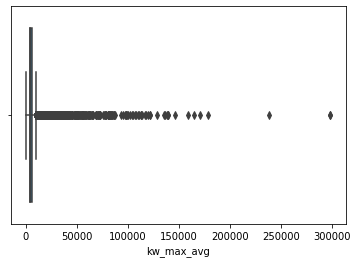

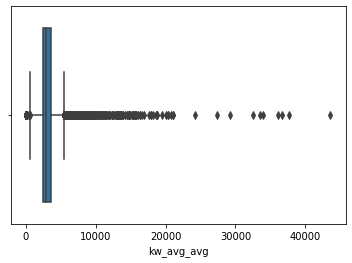

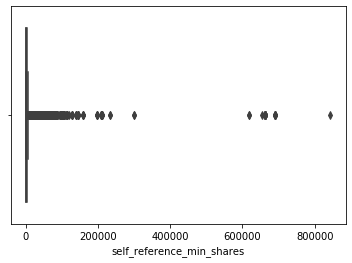

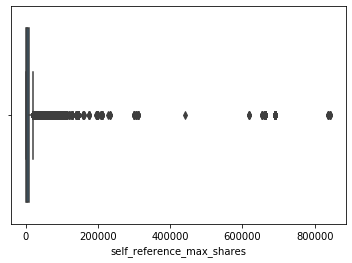

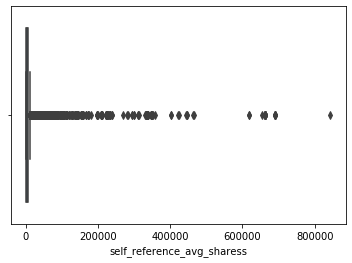

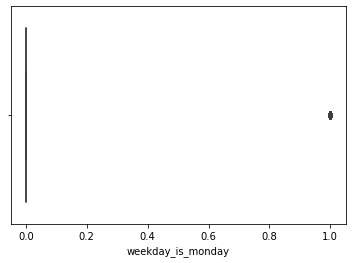

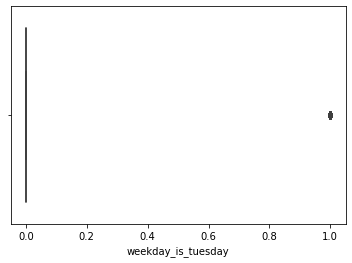

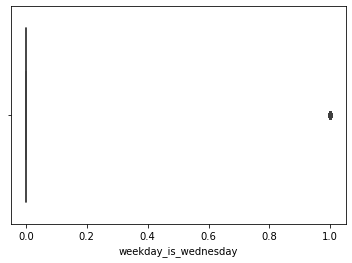

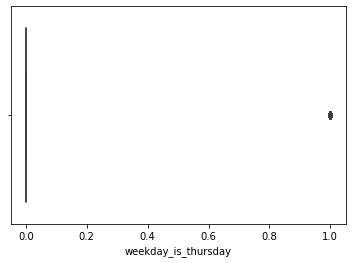

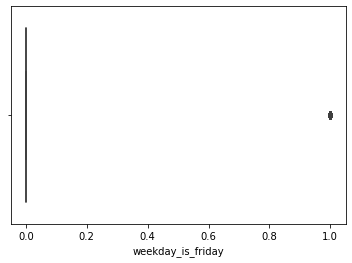

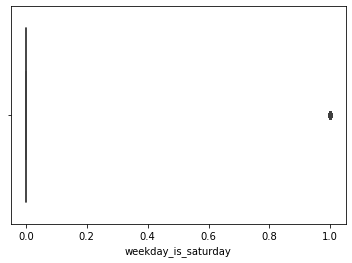

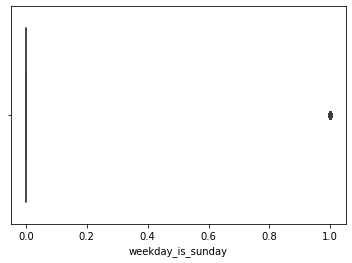

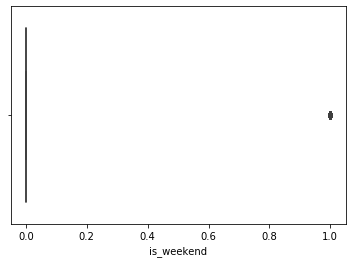

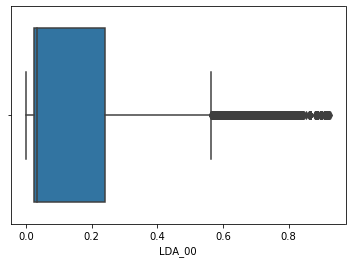

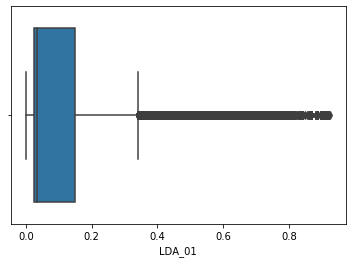

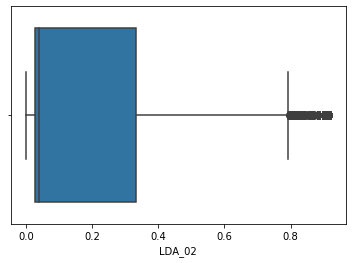

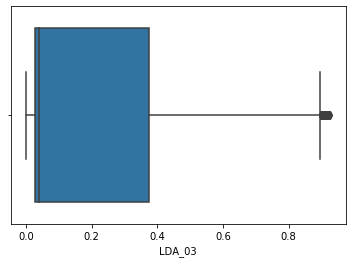

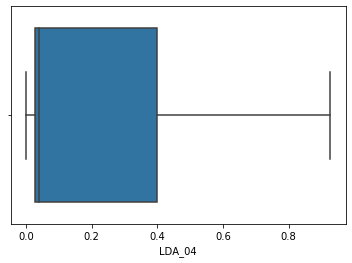

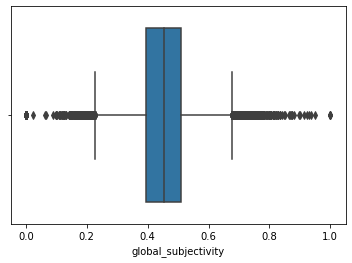

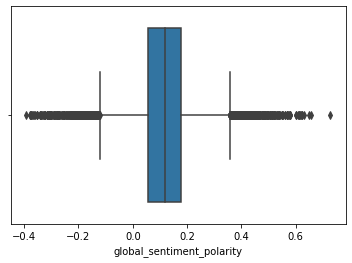

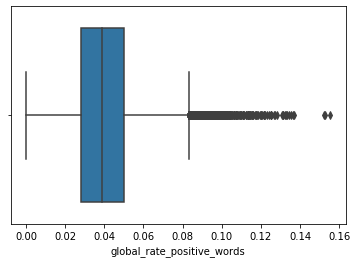

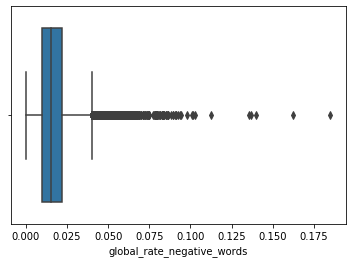

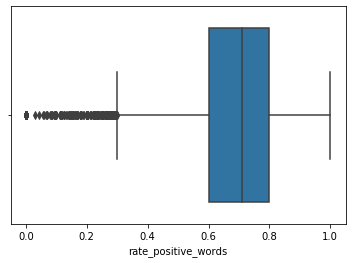

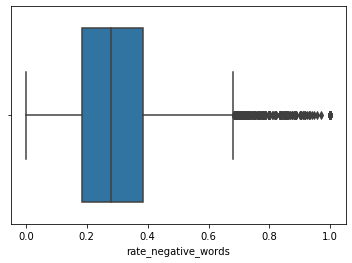

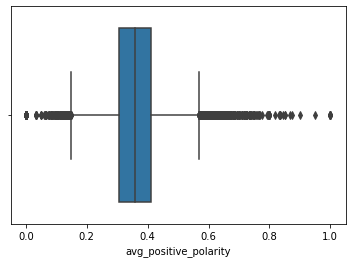

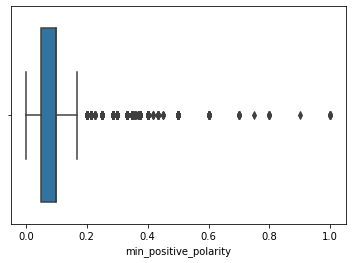

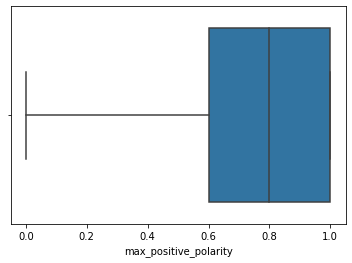

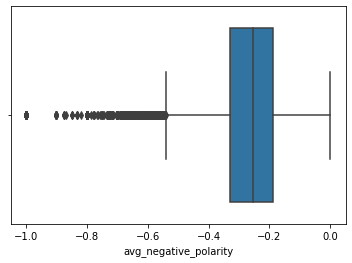

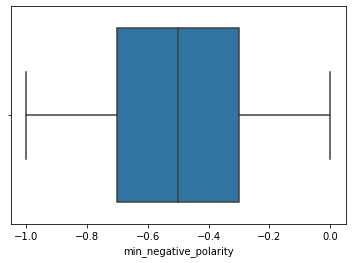

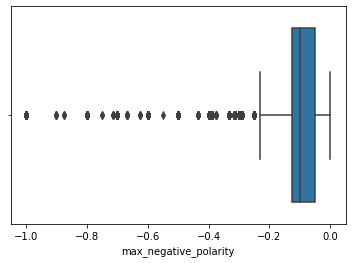

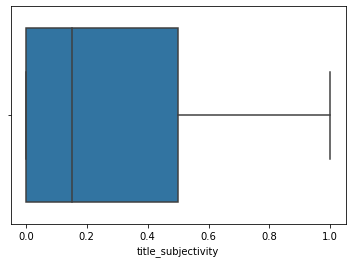

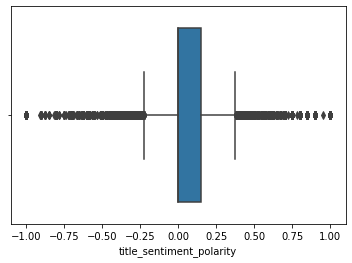

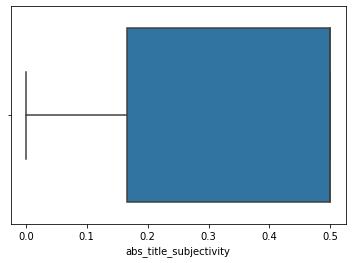

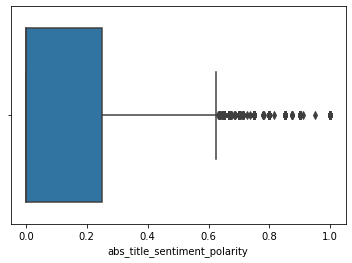

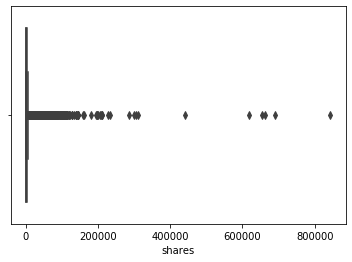

In [30]:
#box plot to check outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

**Too many outliers.So removing them**

In [31]:
#removing outliers
Q1 = df.quantile(q=0.25) 

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 5.000000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max 

In [32]:

sorted_shares = df.sort_values('shares') 

median = sorted_shares['shares'].median() 

q1 = sorted_shares['shares'].quantile(q=0.25) 

q3 = sorted_shares['shares'].quantile(q=0.75) 

iqr = q3-q1

In [33]:
Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


In [34]:
Df = df[df['shares']<=Outer_bound2]

In [35]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 60)
Data after Removing Outliers = (36879, 60)
Number of Outliers = 2765


**Hist plot**

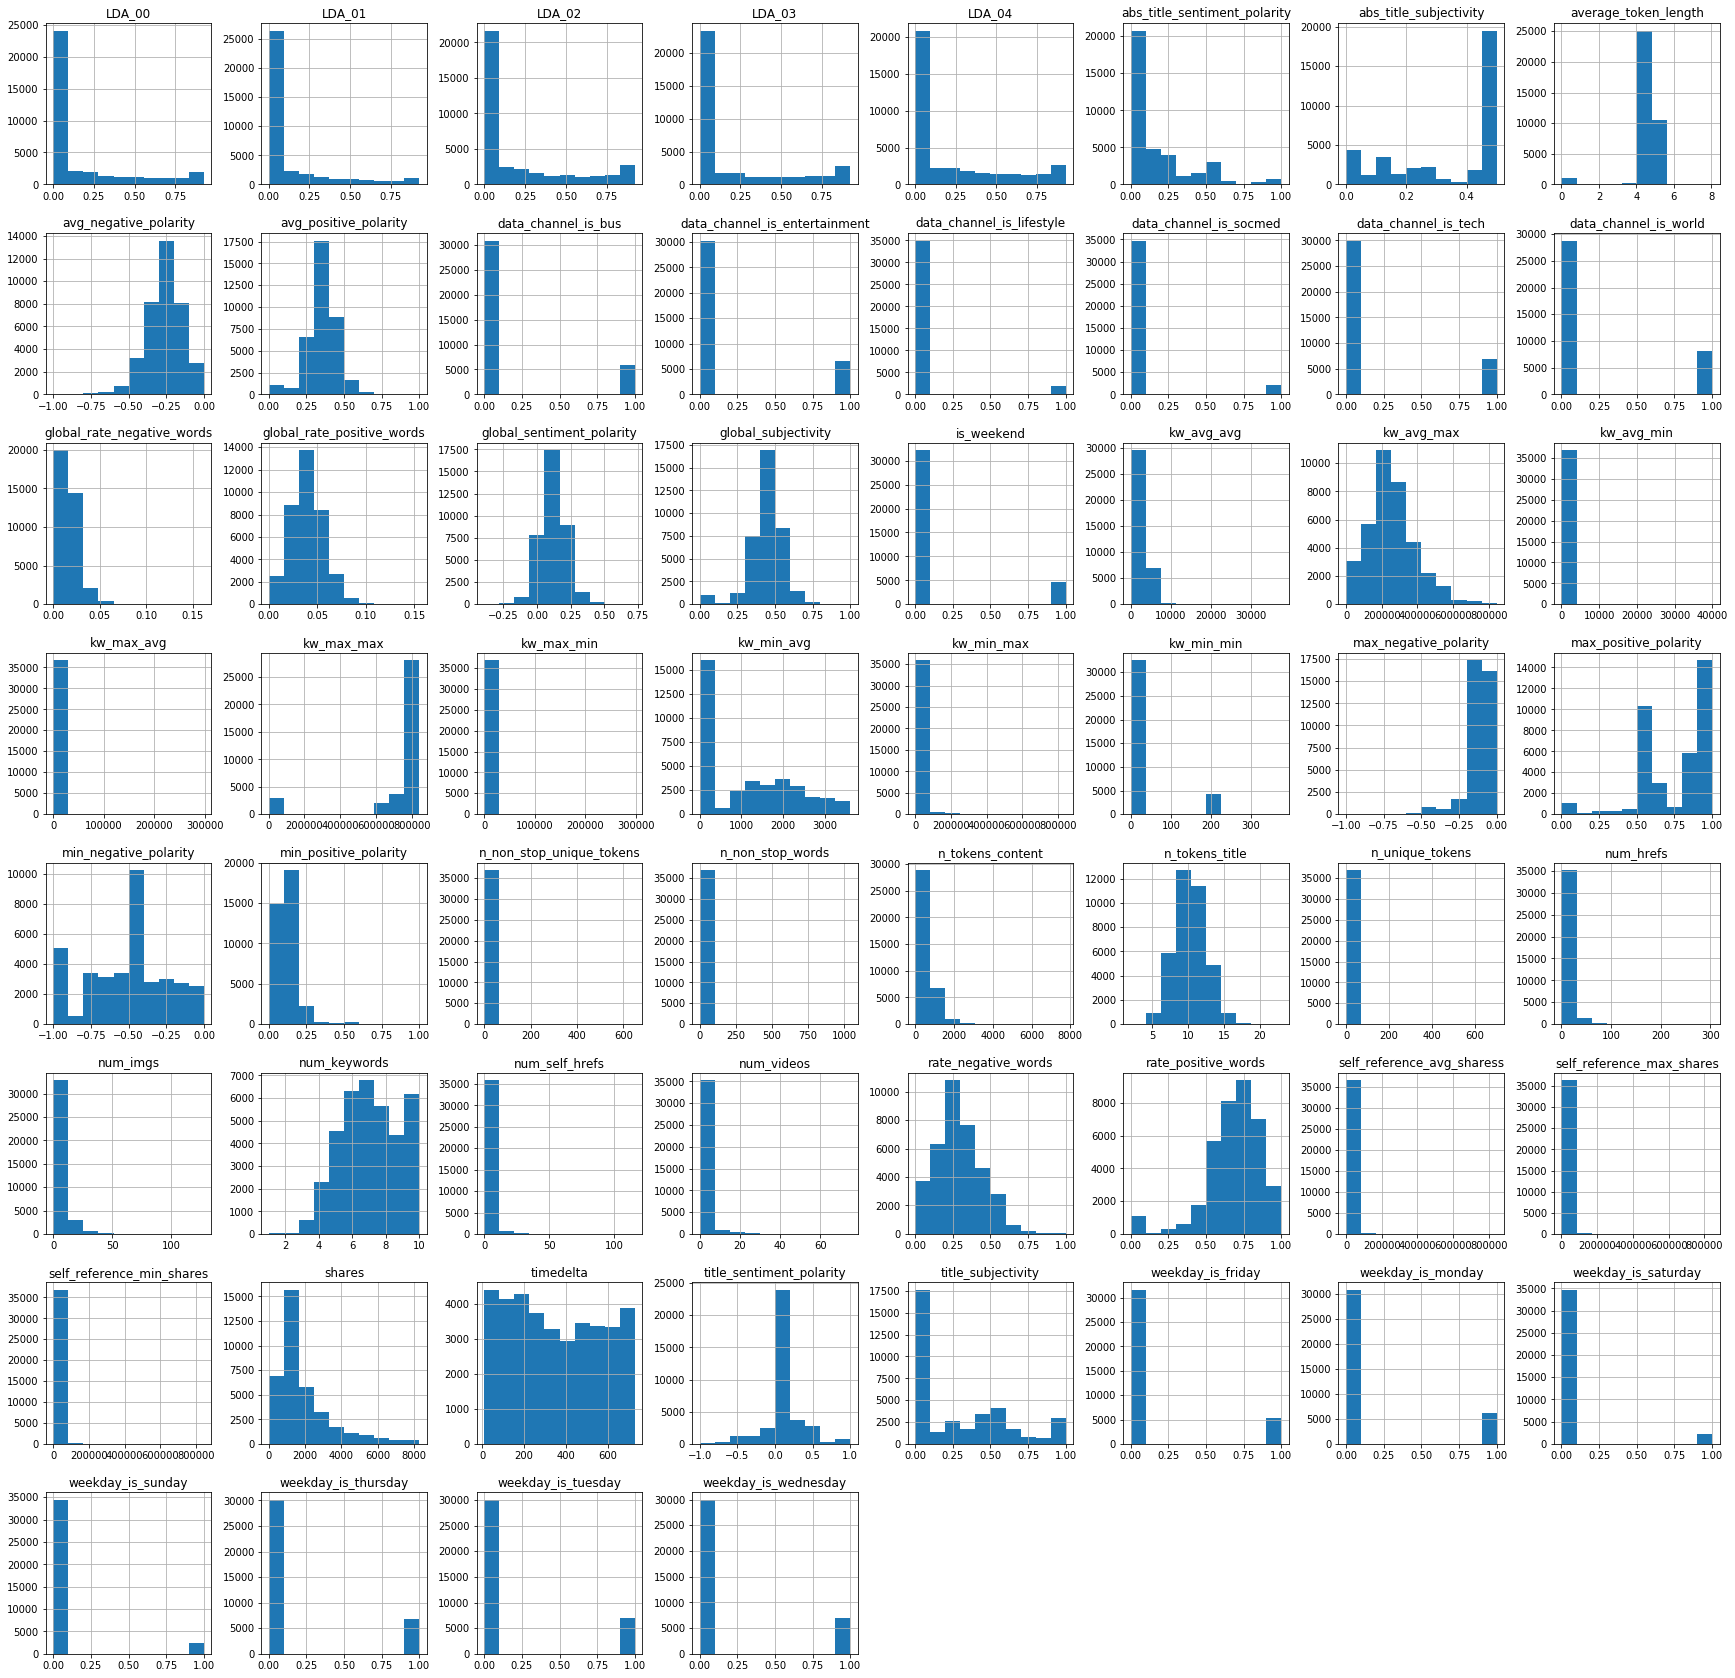

In [36]:
Df.hist(figsize=(30,30))
plt.show()

We can clearly see data is not properly distributed so we need to do scaling and smote 

In [37]:
#EDA
a,b = Df['shares'].mean(),Df['shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [38]:
Wd = Df.columns.values[30:37]
Wd

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

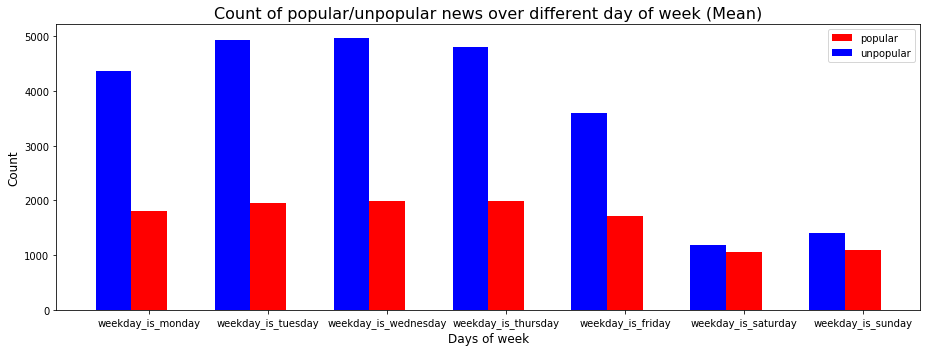

In [39]:
Unpop=Df[Df['shares']<a]
Pop=Df[Df['shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

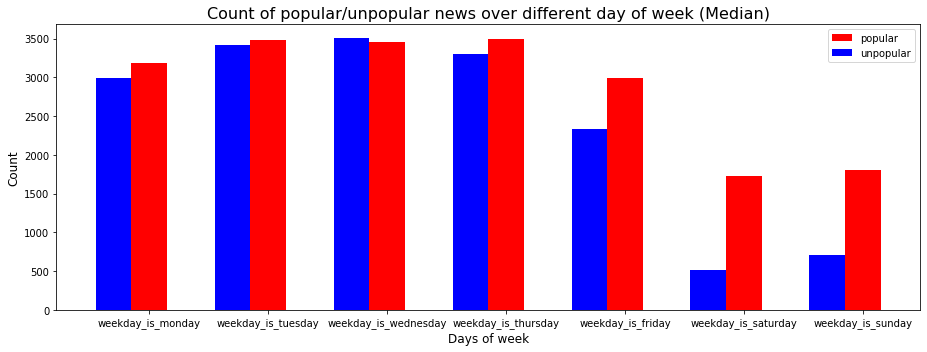

In [40]:
Unpop2=Df[Df['shares']<b]
Pop2=Df[Df['shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [79]:
Dc = Df.columns.values[12:18]
Dc

array(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world'], dtype=object)

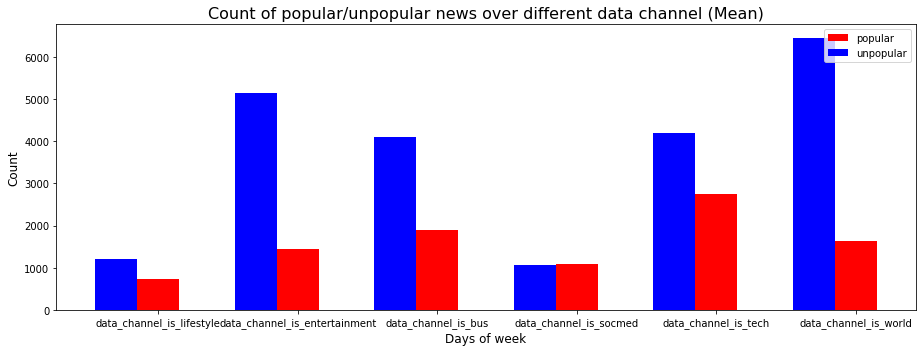

In [42]:
Unpop3=Df[Df['shares']<a]
Pop3=Df[Df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

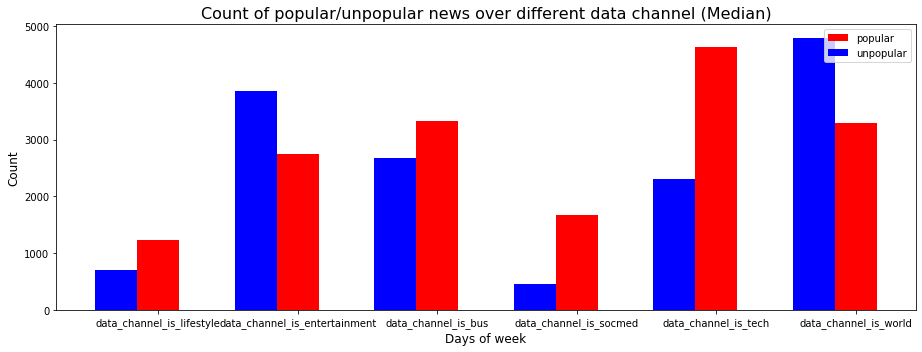

In [43]:
Unpop4=Df[Df['shares']<b]
Pop4=Df[Df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [44]:
Df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [45]:
mean = Df['shares'].mean()

In [47]:
#Converting output columns to 0 and 1
Df['shares'] = Df['shares'].apply(lambda x: 0 if x <mean  else 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
Df['shares'].value_counts()

0    25254
1    11625
Name: shares, dtype: int64

**Scaling and SMOTE**

Scaling and SMOTE is needed because data is not properly distributed

In [49]:
#Scaling and Doing SMOTE 
X = Df.drop('shares',axis=1)
y = Df['shares']

scaler=StandardScaler()
X=scaler.fit_transform(X)
from imblearn.over_sampling import SMOTE
SMOTE().fit_resample(X, y)
X,y = SMOTE().fit_resample(X, y)

Using TensorFlow backend.


In [50]:
print(y)

[0 0 0 ... 1 1 1]


In [51]:
def calculateScore(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen.append(TP / (TP + FN))
    Spe.append(TN / (FP + TN))
    FPR.append(FP / (FP + TN))
    FNR.append(FN / (FN + TP))

**Splitting train and test**

In [52]:
train, test, target_train, target_val = train_test_split(X, 
                                                         y, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [53]:
#Using multiple classifiers
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

**Logistic Regression**

In [54]:
LR = LogisticRegression(multi_class='auto')
LR.fit(train,target_train)
lr_pred = LR.predict(test)
Model.append('Logistic Regression')
Accuracy.append(accuracy_score(target_val,lr_pred))
F1Score.append(f1_score(target_val,lr_pred,average=None))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


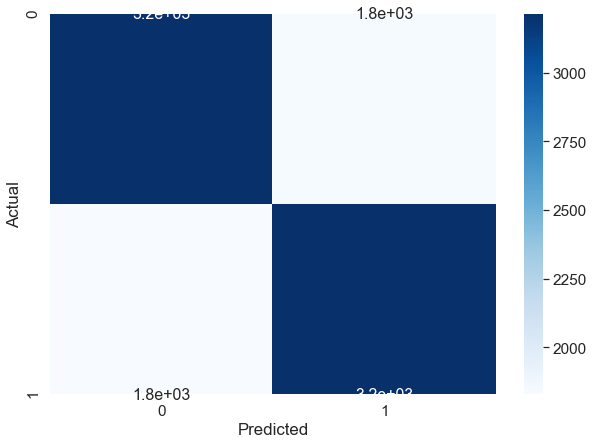

In [55]:
data = confusion_matrix(target_val,lr_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**Random Forrest**

In [56]:
seed = 0
params = {
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
}
rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [57]:
rs.best_params_

{'n_estimators': 30, 'criterion': 'gini'}

In [58]:
rf = RandomForestClassifier(**rs.best_params_)
rf.fit(train, target_train)
rf_pred = rf.predict(test)

**Plot feature importance**

Text(0.5, 0, 'Relative Importance')

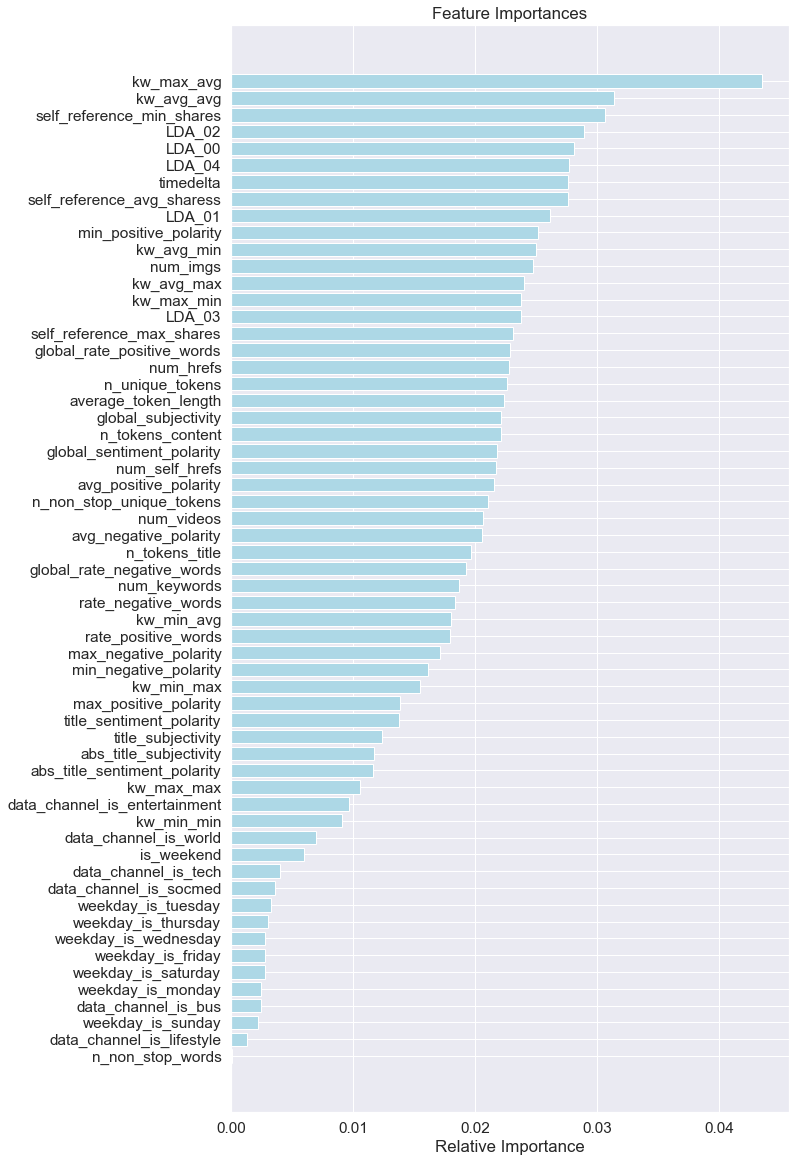

In [59]:
features = Df.columns
importance = rf.feature_importances_
indices = np.argsort(importance)
plt.figure(1,figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

We can clearly see almost all features are important

In [60]:
Model.append('Random Forrest')
Accuracy.append(accuracy_score(target_val,rf_pred))
F1Score.append(f1_score(target_val,rf_pred,average=None))

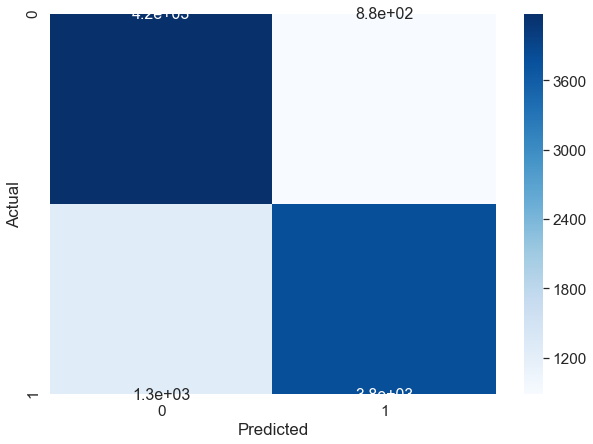

In [61]:
data = confusion_matrix(target_val,rf_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

From confusion matrix we can see there are false positive as well

**Decision Tree****

In [62]:
params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
}
dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [63]:
rs.best_params_

{'splitter': 'random',
 'max_leaf_nodes': 3,
 'max_depth': 4,
 'criterion': 'entropy'}

Text(0.5, 0, 'Relative Importance')

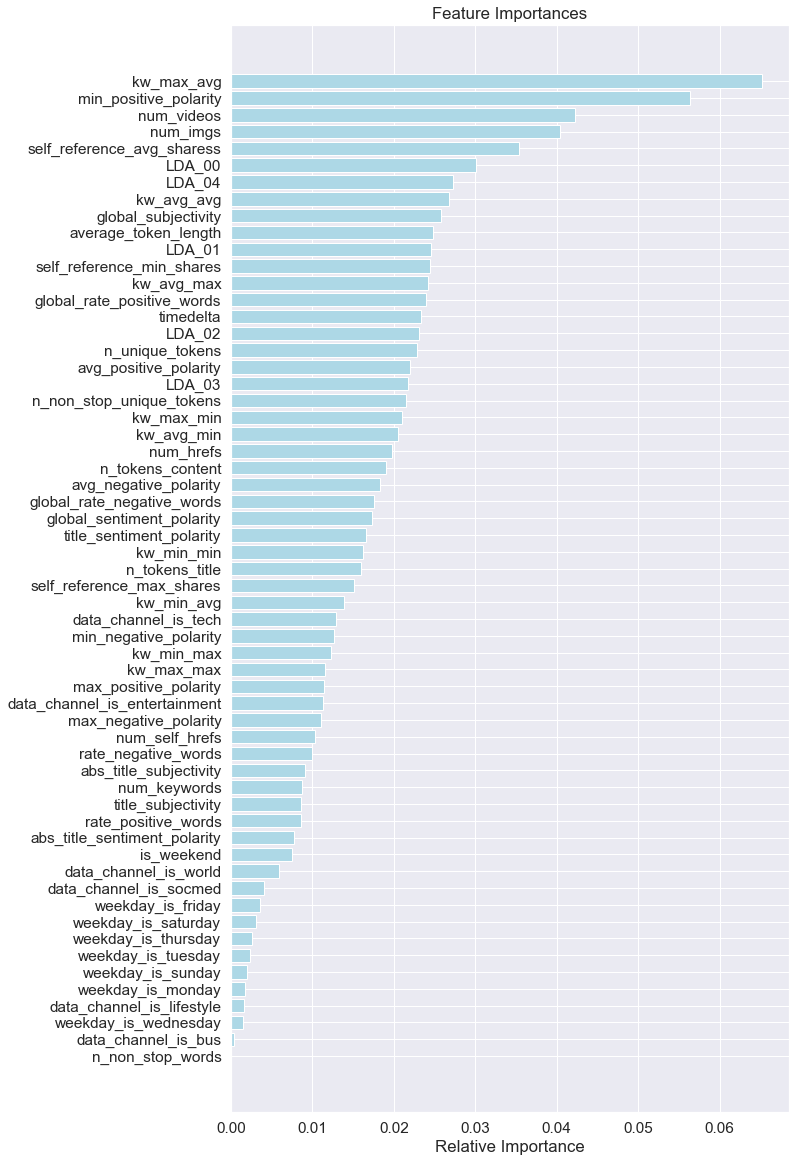

In [64]:
dt = DecisionTreeClassifier()
dt.fit(train, target_train)
dt_pred = dt.predict(test)
features = Df.columns
importance = dt.feature_importances_
indices = np.argsort(importance)
plt.figure(1,figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Again we can see almost all features have importance. few features like n_stop_words has very less importance when compared to others

In [65]:
Model.append('Decision Tree')
Accuracy.append(accuracy_score(target_val,dt_pred))
F1Score.append(f1_score(target_val,dt_pred,average=None))

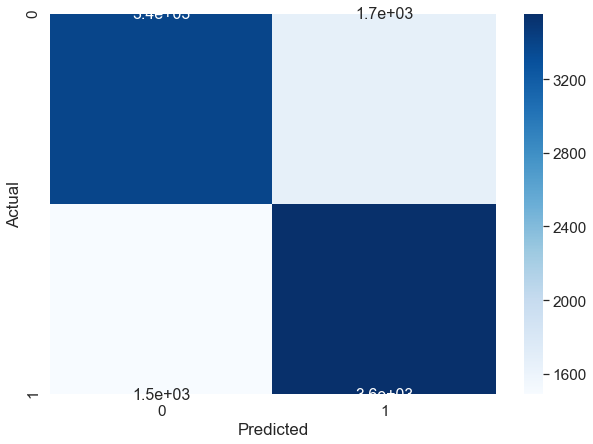

In [66]:
data = confusion_matrix(target_val,dt_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**Gradient Boosting**

In [67]:
gb_Boost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)
gb_Boost.fit(train, target_train)
y_pred = rf.predict(test)

In [68]:
Model.append('Gradient Boosting')
Accuracy.append(accuracy_score(target_val,y_pred))
F1Score.append(f1_score(target_val,dt_pred,average=None))

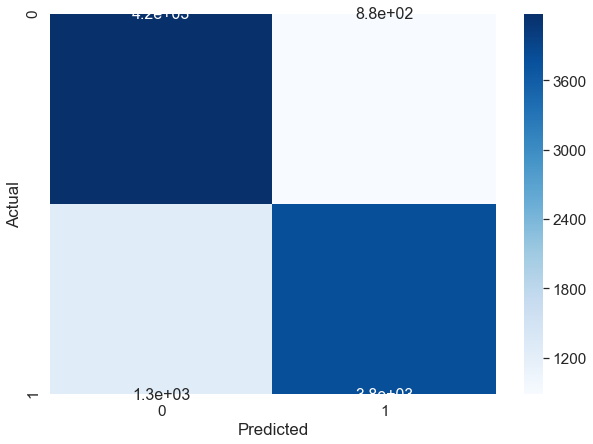

In [69]:
data = confusion_matrix(target_val,y_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**Naive**

In [70]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(train, target_train)
naiveClassifier_pred = naiveClassifier.predict(test)

In [71]:
Model.append('Naive')
Accuracy.append(accuracy_score(target_val,naiveClassifier_pred))
F1Score.append(f1_score(target_val,naiveClassifier_pred,average=None))

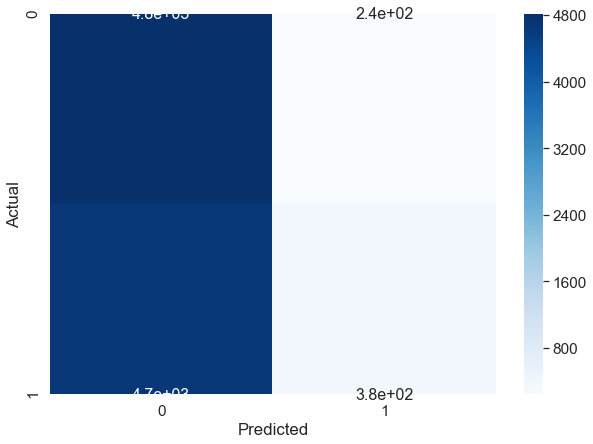

In [72]:
data = confusion_matrix(target_val,naiveClassifier_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**KNN**

In [73]:
# knn = KNeighborsClassifier(n_neighbors=8)
# knn.fit(train, target_train)
# knn_pred = knn.predict(test)

In [74]:
# Model.append('KNN')
# Accuracy.append(accuracy_score(target_val,knn_pred))
# F1Score.append(f1_score(target_val,knn_pred,average=None))

In [75]:
# data = confusion_matrix(target_val,knn_pred)
# calculateScore(data)
# df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
# df_cm.index.name = 'Actual'
# df_cm.columns.name = 'Predicted'
# plt.figure(figsize = (10,7))
# sns.set(font_scale=1.4)
# sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**Comparing models**

In [76]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
result

,Model,Accuracy,F1Score,Sensitivity,Specificity,FPR,FNR
0,Logistic Regression,0.636508,"[0.6365076222530192, 0.6365076222530192]",0.637391,0.635627,0.364373,0.362609
1,Random Forrest,0.786973,"[0.7950085730615355, 0.778281475376056]",0.767096,0.810167,0.189833,0.232904
2,Decision Tree,0.687686,"[0.6824997484150146, 0.6927047823122626]",0.695019,0.680835,0.319165,0.304981
3,Gradient Boosting,0.786973,"[0.6824997484150146, 0.6927047823122626]",0.767096,0.810167,0.189833,0.232904
4,Naive,0.514453,"[0.6625386996904025, 0.1347680366907744]",0.508072,0.611200,0.388800,0.491928


**KNN model is taking long time for differnt values of k but optimal value got was 8. We can see that Random forrest ensemble technique gave maximum accuracy and also F1 score is higher for the same. Also we can see gradient boosting gave almost same accuracy but since F1 score of random forrest is more. Hence ensemble technique is most accurate.**